In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import os
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score


In [2]:
current_directory = os.getcwd()
cleaned_df = pd.read_csv(f'{current_directory}//customer_churn_analysis_cleaned.csv')

cleaned_df.head()

,CustomerID,Age,FirstTransactionDate,LastTransactionDate,TotalAmountSpent,TransactionCount,AvgAmountPerTransaction,FirstInteractionDate,LastInteractionDate,TotalServiceInteractions,...,TotalAmountSpent_Capped_scaled,AvgAmountPerTransaction_scaled,TransactionCount_Capped_scaled,RecencyDays_scaled,TenureDays_scaled,TotalServiceInteractions_scaled,ServiceDiversity_scaled,LoginFrequency_scaled,DaysSinceLastLogin_scaled,InteractionsPerMonth_scaled
0,1,62,2022-03-27,2022-03-27,416.50,1,416.50000,2022-03-31,2022-03-31,1,...,-1.158617,2.113790,-1.557954,2.553962,-1.893562,-0.002451,0.160212,0.575702,-1.021557,1.640262
1,2,65,2022-01-09,2022-11-19,1547.42,7,221.06000,2022-03-17,2022-03-17,1,...,0.386741,-0.349747,0.747849,-0.458190,0.963519,-0.002451,0.160212,-1.488513,-1.450763,-0.377877
2,3,18,2022-02-11,2022-10-08,1702.98,6,283.83000,2022-08-24,2022-08-24,1,...,0.599308,0.441474,0.363548,0.075609,0.281095,-0.002451,0.160212,-1.630872,-1.260005,-0.310978
3,4,21,2022-05-22,2022-12-27,917.29,5,183.45800,2022-07-03,2022-11-18,2,...,-0.474307,-0.823723,-0.020752,-0.941151,0.099115,1.222911,0.160212,-1.702052,-0.477897,0.020261
4,5,21,2022-02-21,2022-12-21,2001.49,8,250.18625,2022-02-21,2023-10-27,0,...,1.007210,0.017392,1.132149,-0.864894,0.863430,-1.227812,-1.209123,1.073961,-1.078785,-0.591061


In [3]:
cleaned_df_copy = cleaned_df.copy()

In [4]:
cleaned_df_copy.groupby('ChurnStatus').size()

ChurnStatus
0    796
1    204
dtype: int64

In [5]:
#classification model
X, y = cleaned_df.drop(['CustomerID','ChurnStatus', 'FirstTransactionDate', 'LastTransactionDate', 'LastLoginDate', 'FirstInteractionDate', 'LastInteractionDate'], axis=1), cleaned_df['ChurnStatus'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [6]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


In [7]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42, bootstrap=True)
rf.fit(X_train_res, y_train_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
y_pred_rf = rf.predict(X_test)
y_pred_rf

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [9]:
y_proba = rf.predict_proba(X_test)[:,1]
y_pred = (y_proba >= 0.3).astype(int)
print(classification_report(y_test, y_pred))
print(f'ROC_AUC Score: {roc_auc_score(y_test, y_proba)}')

              precision    recall  f1-score   support

           0       0.79      0.66      0.72       150
           1       0.31      0.46      0.37        50

    accuracy                           0.61       200
   macro avg       0.55      0.56      0.54       200
weighted avg       0.67      0.61      0.63       200

ROC_AUC Score: 0.6072


In [10]:
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Classifier Accuracy: {rf_accuracy:.2f}')
precision = sklearn.metrics.precision_score(y_test, y_pred_rf)
recall = sklearn.metrics.recall_score(y_test, y_pred_rf)
f1 = sklearn.metrics.f1_score(y_test, y_pred_rf)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Random Forest Classifier Accuracy: 0.74
Precision: 0.40
Recall: 0.04
F1 Score: 0.07


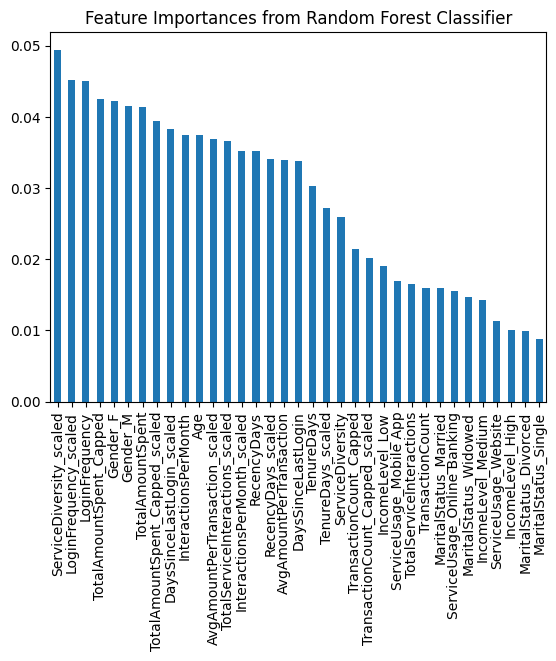

In [11]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()
plt.title('Feature Importances from Random Forest Classifier')
plt.show() 

In [12]:
cleaned_df_copy['Rf_Predicted_ChurnStatus'] = rf.predict(X)
cleaned_df_copy['Rf_Churn_Probability'] = rf.predict_proba(X)[:, 1]
cleaned_df_copy

,CustomerID,Age,FirstTransactionDate,LastTransactionDate,TotalAmountSpent,TransactionCount,AvgAmountPerTransaction,FirstInteractionDate,LastInteractionDate,TotalServiceInteractions,...,TransactionCount_Capped_scaled,RecencyDays_scaled,TenureDays_scaled,TotalServiceInteractions_scaled,ServiceDiversity_scaled,LoginFrequency_scaled,DaysSinceLastLogin_scaled,InteractionsPerMonth_scaled,Rf_Predicted_ChurnStatus,Rf_Churn_Probability
0,1,62,2022-03-27,2022-03-27,416.50,1,416.500000,2022-03-31,2022-03-31,1,...,-1.557954,2.553962,-1.893562,-0.002451,0.160212,0.575702,-1.021557,1.640262,0,0.11
1,2,65,2022-01-09,2022-11-19,1547.42,7,221.060000,2022-03-17,2022-03-17,1,...,0.747849,-0.458190,0.963519,-0.002451,0.160212,-1.488513,-1.450763,-0.377877,1,0.81
2,3,18,2022-02-11,2022-10-08,1702.98,6,283.830000,2022-08-24,2022-08-24,1,...,0.363548,0.075609,0.281095,-0.002451,0.160212,-1.630872,-1.260005,-0.310978,0,0.14
3,4,21,2022-05-22,2022-12-27,917.29,5,183.458000,2022-07-03,2022-11-18,2,...,-0.020752,-0.941151,0.099115,1.222911,0.160212,-1.702052,-0.477897,0.020261,0,0.21
4,5,21,2022-02-21,2022-12-21,2001.49,8,250.186250,2022-02-21,2023-10-27,0,...,1.132149,-0.864894,0.863430,-1.227812,-1.209123,1.073961,-1.078785,-0.591061,0,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,2022-07-24,2022-07-24,227.25,1,227.250000,2022-07-24,2023-01-29,0,...,-1.557954,1.041531,-1.893562,-1.227812,-1.209123,0.860422,1.505987,-0.591061,0,0.17
996,997,19,2022-08-06,2022-10-25,419.82,2,209.910000,2022-08-06,2023-04-01,0,...,-1.173654,-0.140453,-1.165644,-1.227812,-1.209123,-1.488513,0.914637,-0.591061,0,0.07
997,998,47,2022-09-18,2022-09-18,252.15,1,252.150000,2022-09-18,2023-07-10,0,...,-1.557954,0.329799,-1.893562,-1.227812,-1.209123,1.501040,-0.039153,-0.591061,0,0.06
998,999,23,2022-01-20,2022-12-07,2393.26,9,265.917778,2022-01-20,2023-01-08,0,...,1.516450,-0.686961,1.027212,-1.227812,-1.209123,-0.207276,1.706283,-0.591061,0,0.12


In [13]:
from sklearn.svm import SVC

svm_classifier = SVC(probability=True, class_weight='balanced', random_state=42)
svm_classifier.fit(X_train_res, y_train_res)
y_pred_svm = svm_classifier.predict(X_test)
y_proba_svm = svm_classifier.predict_proba(X_test)[:,1]
print(classification_report(y_test, y_pred_svm))
print(f'ROC_AUC Score: {roc_auc_score(y_test, y_proba_svm)}')

              precision    recall  f1-score   support

           0       0.81      0.58      0.68       150
           1       0.32      0.60      0.42        50

    accuracy                           0.58       200
   macro avg       0.57      0.59      0.55       200
weighted avg       0.69      0.58      0.61       200

ROC_AUC Score: 0.5633333333333334


In [14]:
cleaned_df_copy['SVM_Predicted_ChurnStatus'] = svm_classifier.predict(X)
cleaned_df_copy['SVM_Churn_Probability'] = svm_classifier.predict_proba(X)[:, 1]
cleaned_df_copy

,CustomerID,Age,FirstTransactionDate,LastTransactionDate,TotalAmountSpent,TransactionCount,AvgAmountPerTransaction,FirstInteractionDate,LastInteractionDate,TotalServiceInteractions,...,TenureDays_scaled,TotalServiceInteractions_scaled,ServiceDiversity_scaled,LoginFrequency_scaled,DaysSinceLastLogin_scaled,InteractionsPerMonth_scaled,Rf_Predicted_ChurnStatus,Rf_Churn_Probability,SVM_Predicted_ChurnStatus,SVM_Churn_Probability
0,1,62,2022-03-27,2022-03-27,416.50,1,416.500000,2022-03-31,2022-03-31,1,...,-1.893562,-0.002451,0.160212,0.575702,-1.021557,1.640262,0,0.11,1,0.493450
1,2,65,2022-01-09,2022-11-19,1547.42,7,221.060000,2022-03-17,2022-03-17,1,...,0.963519,-0.002451,0.160212,-1.488513,-1.450763,-0.377877,1,0.81,0,0.465992
2,3,18,2022-02-11,2022-10-08,1702.98,6,283.830000,2022-08-24,2022-08-24,1,...,0.281095,-0.002451,0.160212,-1.630872,-1.260005,-0.310978,0,0.14,0,0.459413
3,4,21,2022-05-22,2022-12-27,917.29,5,183.458000,2022-07-03,2022-11-18,2,...,0.099115,1.222911,0.160212,-1.702052,-0.477897,0.020261,0,0.21,1,0.517766
4,5,21,2022-02-21,2022-12-21,2001.49,8,250.186250,2022-02-21,2023-10-27,0,...,0.863430,-1.227812,-1.209123,1.073961,-1.078785,-0.591061,0,0.03,0,0.445970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,2022-07-24,2022-07-24,227.25,1,227.250000,2022-07-24,2023-01-29,0,...,-1.893562,-1.227812,-1.209123,0.860422,1.505987,-0.591061,0,0.17,0,0.462144
996,997,19,2022-08-06,2022-10-25,419.82,2,209.910000,2022-08-06,2023-04-01,0,...,-1.165644,-1.227812,-1.209123,-1.488513,0.914637,-0.591061,0,0.07,1,0.488114
997,998,47,2022-09-18,2022-09-18,252.15,1,252.150000,2022-09-18,2023-07-10,0,...,-1.893562,-1.227812,-1.209123,1.501040,-0.039153,-0.591061,0,0.06,0,0.456019
998,999,23,2022-01-20,2022-12-07,2393.26,9,265.917778,2022-01-20,2023-01-08,0,...,1.027212,-1.227812,-1.209123,-0.207276,1.706283,-0.591061,0,0.12,1,0.500000


In [15]:
neg = cleaned_df_copy['ChurnStatus'].value_counts()[0]
pos = cleaned_df_copy['ChurnStatus'].value_counts()[1]
scale = neg / pos
scale


np.float64(3.9019607843137254)

In [16]:
xgb_classifier = xgb.XGBClassifier(
    eval_metric='logloss',
    scale_pos_weight=scale,
    learning_rate=0.05,       # slightly higher to converge faster
    max_depth=7,
    n_estimators=1000,       # more boosting rounds
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=1,                 # minimum loss reduction to split
    min_child_weight=3,      # controls overfitting
    reg_lambda=1,            # L2 regularization
    random_state=42,
    use_label_encoder=False
)

# Fit with early stopping on validation set
xgb_classifier.fit(
    X_train_res, y_train_res,
    eval_set=[(X_test, y_test)],
    verbose=False
)


d:\63947\Documents\GitHub\lloyds-banking-group-eda-theforage\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:35:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [17]:
predictions = xgb_classifier.predict(X_test)
y_pred_xgb = (xgb_classifier.predict_proba(X_test)[:,1] >= 0.3).astype(int)
y_pred_xgb

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1])

In [18]:
print('XGBoost Classifier Results')
print(classification_report(y_test, y_pred_xgb))
print(f'ROC_AUC Score: {roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:,1])}')

XGBoost Classifier Results
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       150
           1       0.27      0.32      0.29        50

    accuracy                           0.61       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.64      0.61      0.62       200

ROC_AUC Score: 0.5628


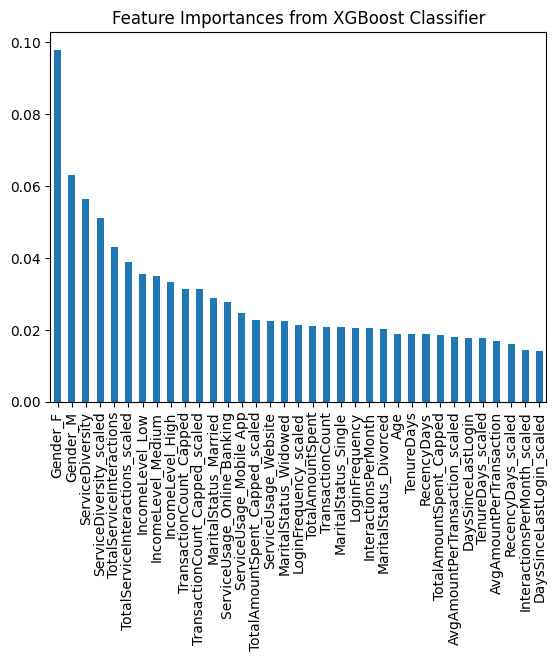

In [19]:
xgb_fi = pd.Series(xgb_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)
xgb_fi.plot.bar()
plt.title('Feature Importances from XGBoost Classifier')
plt.show()

In [20]:
cleaned_df_copy['XGB_Predicted_ChurnStatus'] = xgb_classifier.predict(X)
cleaned_df_copy['XGB_Churn_Probability'] = xgb_classifier.predict_proba(X)[:, 1]
cleaned_df_copy

,CustomerID,Age,FirstTransactionDate,LastTransactionDate,TotalAmountSpent,TransactionCount,AvgAmountPerTransaction,FirstInteractionDate,LastInteractionDate,TotalServiceInteractions,...,ServiceDiversity_scaled,LoginFrequency_scaled,DaysSinceLastLogin_scaled,InteractionsPerMonth_scaled,Rf_Predicted_ChurnStatus,Rf_Churn_Probability,SVM_Predicted_ChurnStatus,SVM_Churn_Probability,XGB_Predicted_ChurnStatus,XGB_Churn_Probability
0,1,62,2022-03-27,2022-03-27,416.50,1,416.500000,2022-03-31,2022-03-31,1,...,0.160212,0.575702,-1.021557,1.640262,0,0.11,1,0.493450,0,0.262073
1,2,65,2022-01-09,2022-11-19,1547.42,7,221.060000,2022-03-17,2022-03-17,1,...,0.160212,-1.488513,-1.450763,-0.377877,1,0.81,0,0.465992,1,0.954313
2,3,18,2022-02-11,2022-10-08,1702.98,6,283.830000,2022-08-24,2022-08-24,1,...,0.160212,-1.630872,-1.260005,-0.310978,0,0.14,0,0.459413,0,0.099234
3,4,21,2022-05-22,2022-12-27,917.29,5,183.458000,2022-07-03,2022-11-18,2,...,0.160212,-1.702052,-0.477897,0.020261,0,0.21,1,0.517766,0,0.235973
4,5,21,2022-02-21,2022-12-21,2001.49,8,250.186250,2022-02-21,2023-10-27,0,...,-1.209123,1.073961,-1.078785,-0.591061,0,0.03,0,0.445970,0,0.016963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,2022-07-24,2022-07-24,227.25,1,227.250000,2022-07-24,2023-01-29,0,...,-1.209123,0.860422,1.505987,-0.591061,0,0.17,0,0.462144,0,0.055618
996,997,19,2022-08-06,2022-10-25,419.82,2,209.910000,2022-08-06,2023-04-01,0,...,-1.209123,-1.488513,0.914637,-0.591061,0,0.07,1,0.488114,0,0.033399
997,998,47,2022-09-18,2022-09-18,252.15,1,252.150000,2022-09-18,2023-07-10,0,...,-1.209123,1.501040,-0.039153,-0.591061,0,0.06,0,0.456019,0,0.044644
998,999,23,2022-01-20,2022-12-07,2393.26,9,265.917778,2022-01-20,2023-01-08,0,...,-1.209123,-0.207276,1.706283,-0.591061,0,0.12,1,0.500000,0,0.044293
